In [71]:
# Import Dependencies
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import R

In [72]:
def load_traj(filename):
    """
    Load trajectory data from an `.xvg` file, extracting specific columns of numerical data.

    Parameters:
    filename (str): The file path from which to load data.

    Returns:
    numpy.ndarray: An array of trajectory data extracted from specified columns.
    """
    # Initialize a list to store the relevant data points
    data = []

    # Open the file in read mode
    with open(filename, 'r') as f:
        # Iterate through each line of the file
        for line in f:
            
            # Skip lines that start with '#' or '@' since these are header or comment lines
            if line.startswith('#') or line.startswith('@'):
                continue

            # Split the line into components based on any amount of whitespace
            data_i = line.split()

            # Extract the first and second numerical columns and convert them to floats
            data.append([float(data_i[0]), float(data_i[1])])

    # Convert the list of data into a NumPy array for efficient numerical operations
    return np.array(data)

In [73]:
# Initialize an empty list to store trajectory data from multiple files
traj = []

# Loop through a range of numbers to construct filenames dynamically
for i in range(1, 9):
    filename = f'replica_{i}.xvg'
    try:
        # Load trajectory data from each file and append to the list
        traj_data = load_traj(filename)
        traj.append(traj_data)
        print(f'Successfully loaded data from {filename}')
    except Exception as e:
        # Handle cases where the file may not be read properly
        print(f'Failed to load data from {filename}: {e}')

# Check if the list is not empty to avoid index errors
if traj:
    # Print the shape of the array from the first file to check data structure
    print(f'Shape of the data from the first file: {traj[0].shape}')
else:
    print('No trajectory data was loaded.')

Successfully loaded data from replica_1.xvg
Successfully loaded data from replica_2.xvg
Successfully loaded data from replica_3.xvg
Successfully loaded data from replica_4.xvg
Successfully loaded data from replica_5.xvg
Successfully loaded data from replica_6.xvg
Successfully loaded data from replica_7.xvg
Successfully loaded data from replica_8.xvg
Shape of the data from the first file: (101000, 2)


In [74]:
def free_energy(traj, temp, bins=60):
    """
    Calculate the free energy landscape from Ramachandran plot data.
    
    Parameters:
    traj (numpy.ndarray): Array containing Ramachandran plot data, shape (N, 2).
    temp (float): Temperature in Kelvin.
    bins (int): Number of bins for histogramming the data.
    
    Returns:
    tuple: Tuple containing (x_centers, y_centers, energy.T), where `x_centers` and `y_centers`
    are arrays representing the bin centers, and `energy.T` is the transposed matrix of normalized free energy values.
    """
    
    # Calculate the 2D histogram for the Ramachandran plot data
    counts, x_edges, y_edges = np.histogram2d(traj[:, 0], traj[:, 1], bins=bins)
    
    # Handle zero counts to avoid log(0) which is undefined
    counts_with_zeros = counts.copy()
    counts_with_zeros[counts == 0] = np.nan  # Replace zeros with NaN
    
    # Calculate the free energy landscape from count data, avoiding log(0) by using counts_with_zeros
    energy = -np.log(counts_with_zeros) * 8.314 * temp * 0.001  # R (gas constant) in J/(mol*K)
    
    # Normalize energy by subtracting the minimum energy value to set it to zero
    min_energy = np.nanmin(energy)
    if np.isfinite(min_energy):  # Check if min_energy is finite
        energy -= min_energy
    
    # Compute the center of each bin in x and y directions
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    
    return x_centers, y_centers, energy.T

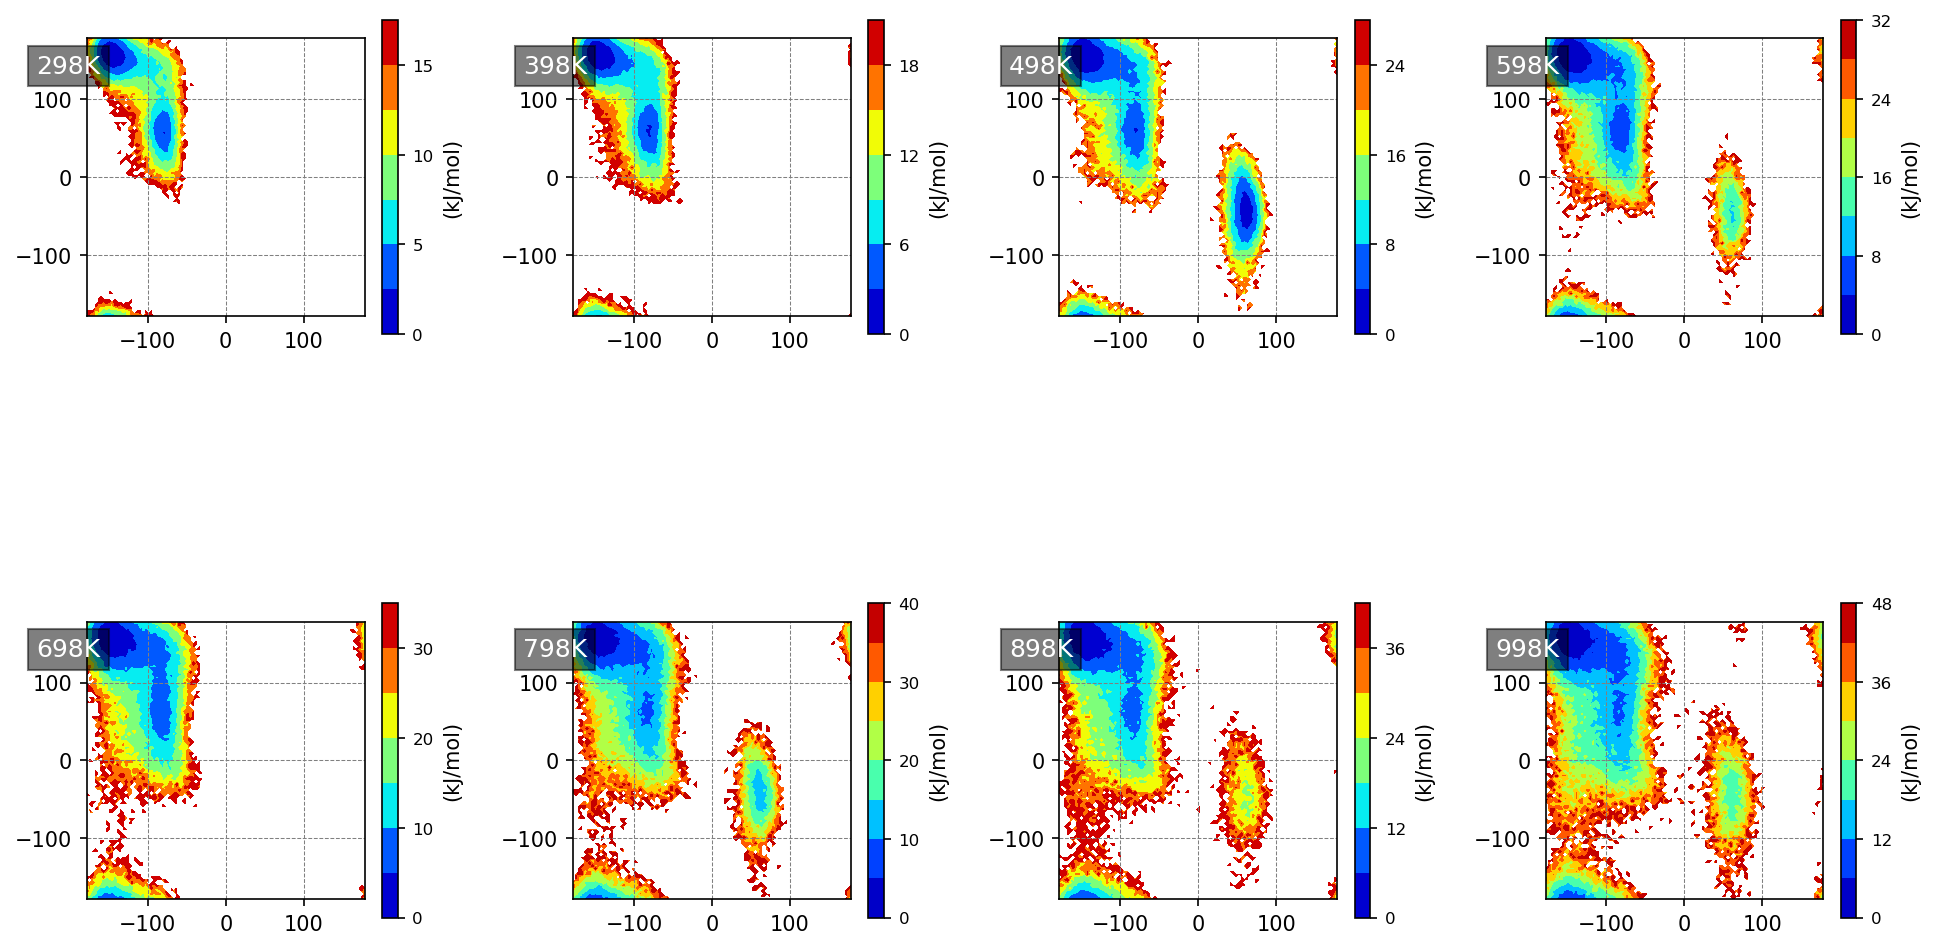

In [75]:
# Adjust the figure size and spacing to make it more compact
fig, axs = plt.subplots(2, 4, figsize=(14, 8), dpi=150)
plt.subplots_adjust(left=0.07, right=0.93, bottom=0.07, top=0.93, wspace=0.4, hspace=0.3)

temperatures = [298, 398, 498, 598, 698, 798, 898, 998]

for i in range(2):
    for j in range(4):
        idx = 4 * i + j  # Ensure accurate indexing
        if idx < len(temperatures):  # Check to avoid indexing errors
            x_center, y_center, energy = free_energy(traj[idx], temperatures[idx], bins=100)

            # Use the 'jet' colormap
            contour = axs[i, j].contourf(x_center, y_center, energy, cmap='jet')

            # Add grid lines for clarity
            axs[i, j].grid(True, linestyle='--', linewidth=0.5, color='gray')

            # Set aspect ratio and other attributes
            axs[i, j].set_aspect('equal')
            axs[i, j].tick_params(axis='both', labelsize=10)

            # Add a colorbar with a title
            cbar = plt.colorbar(contour, ax=axs[i, j], shrink=0.7)
            cbar.ax.tick_params(labelsize=8)
            cbar.ax.locator_params(nbins=5)
            cbar.set_label('(kJ/mol)', fontsize=10)

            # Place temperature inside the plot
            axs[i, j].text(0.05, 0.9, f'{temperatures[idx]}K', transform=axs[i, j].transAxes,
                           fontsize=12, color='white', ha='right', va='center', bbox=dict(facecolor='black', alpha=0.5))

# Display the final plot
plt.show()